# Évaluation des modèles

Il existe de nombreux algorithmes de classification en Machine Learning:
https://scikit-learn.org/stable/user_guide.html


Avec Scikit-learn, le processus est toujours le même :
1. Créer un modèle en lui indiquant les paramètres souhaités. Dans le cas de la classification, la classe sera un classifier (dans l’exemple, il s’agit d’un TreeClassifier, c’est-à-dire un arbre de décision).
2. Faire l’apprentissage grâce à fit, en lui fournissant les données X et y d’apprentissage (il est possible d’utiliser de la validation croisée ou une optimisation des hyperparamètres (voir Modélisation et évaluation)
3. Prédire les résultats sur le dataset souhaité grâce à predict.
4. Appeler les différentes métriques souhaitées présentes dans sklearn.metrics avec en paramètres les résultats attendus et les données prédites.




In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Chargement du dataset Iris
iris_df = pd.read_csv('iris.csv')
y = iris_df['variety']
X = iris_df.drop(labels='variety', axis=1)

# Chargement des données
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Création d'un modèle
classifier = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit du modèle
classifier.fit(train_X, train_y)

# Prédiction
pred_y = classifier.predict(test_X)

# Evaluation
print(confusion_matrix(test_y, pred_y))
print(accuracy_score(test_y, pred_y))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
0.9777777777777777


In [32]:
iris_df.iloc[:, 4].nunique()


3

In [34]:
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Interprétation
Ce modèle apprend à prédire à quelle espèce appartient une fleur en se basant sur les mesures des sépales et des pétales:
Setosa (0)
Versicolor (1)
Virginica (2)

Lignes = Réalité (ce que la fleur est vraiment)
Colonnes = Prédiction du modèle

Donc, comme on peut voir ici:
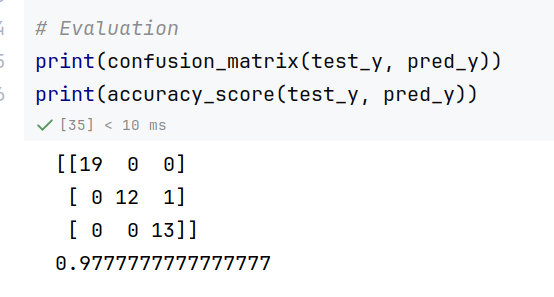

Le modèle a pu prédire:
19 fleurs réellement Setosa (0) -> toutes bien classées.
13 fleurs réellement Versicolor (1) -> 12 bien classées, 1 mal classée (Virginica).
13 fleurs réellement Virginica (2) -> toutes bien classées.

On a donc une précision de 44/45 ou 97.78%, ce qui est excellent

# DecisionTreeClassifier
L’arbre construit des règles du genre :
if PetalLength < 2.45:
    return Setosa
elif PetalWidth < 1.75:
    return Versicolor
else:
    return Virginica




